Olá, lembrando que usaremos o geojson gfd_unidos em que consiste com essas informações

{
  "type": "Feature",
  "properties": {
    "ogc_fid": 1.0,
    "id": 6726,
    "Instância": 9696,
    "Data Inicial": "26/07/2022",
    "Data Final": "05/08/2022",
    "Cena": "22KFC",
    "Score": "0.9",
    "Data Processamento": "08/08/2022 13:08",
    "Bioma": "Cerrado",
    "NuFis": "Triângulo Mineiro",
    "Cia PM": "5"
  },
  "geometry": {
    "type": "Polygon",
    "coordinates": [ ... ]
  }
}

Qual a área total desmatada em hectares no estado de Minas Gerais em cada um dos meses de agosto e setembro de 2022?


In [18]:
gdf_unido.head(5)

,ogc_fid,id,Instância,Data Inicial,Data Final,Cena,Score,Data Processamento,Bioma,NuFis,Cia PM,geometry,mes,area_ha
0,1.0,6726,9696,26/07/2022,05/08/2022,22KFC,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((65610.256 7779397.013, 65659.326 777...",agosto,15.227057
1,2.0,6727,9700,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((31696.271 7842130.438, 31989.678 784...",agosto,74.229201
2,3.0,6728,9701,21/07/2022,26/07/2022,22KFD,0.9,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50597.259 7823297.562, 50665.831 782...",agosto,2.564768
3,4.0,6729,9702,21/07/2022,05/08/2022,22KFD,0.93,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((50538.446 7823306.388, 50636.036 782...",agosto,3.314089
4,5.0,6730,9703,21/07/2022,05/08/2022,22KFD,0.91,08/08/2022 13:08,Cerrado,Triângulo Mineiro,5,"POLYGON ((67719.523 7822648.62, 67877.128 7822...",agosto,80.671799


Área total desmatada em agosto: 12557.69 hectares
Área total desmatada em setembro: 28605.45 hectares


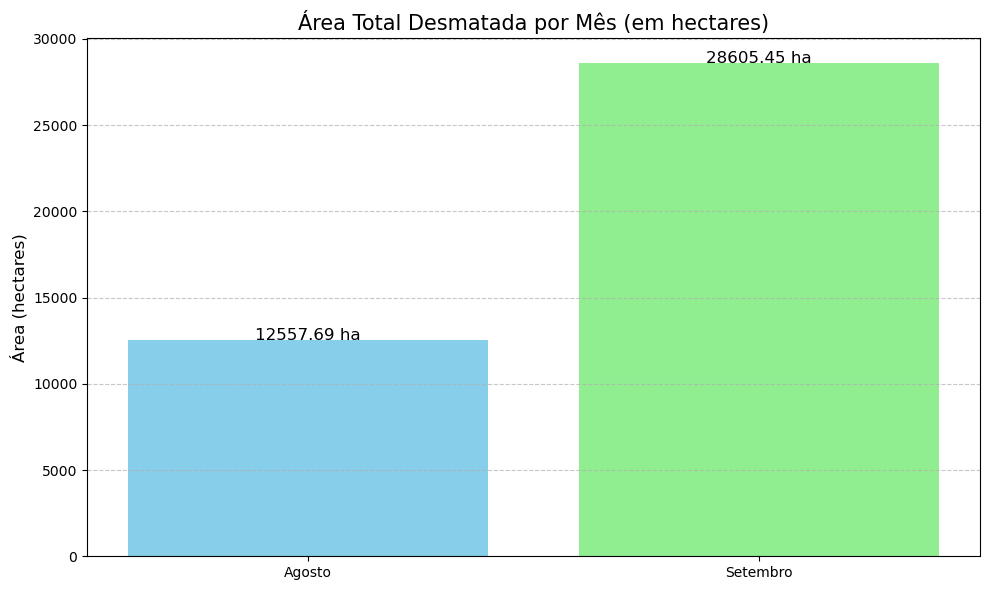

In [16]:
# Script para calcular a área total desmatada em hectares por mês (agosto e setembro)

# Filtrar os dados para agosto e setembro
agosto = gdf_unido[gdf_unido['mes'] == 'agosto']
setembro = gdf_unido[gdf_unido['mes'] == 'setembro']

# Calcular a área total em hectares para cada mês
area_total_agosto = agosto['area_ha'].sum()
area_total_setembro = setembro['area_ha'].sum()

# Exibir os resultados
print(f"Área total desmatada em agosto: {area_total_agosto:.2f} hectares")
print(f"Área total desmatada em setembro: {area_total_setembro:.2f} hectares")

# Criar um gráfico de barras para visualizar a comparação
import matplotlib.pyplot as plt

meses = ['Agosto', 'Setembro']
areas = [area_total_agosto, area_total_setembro]

plt.figure(figsize=(10, 6))
plt.bar(meses, areas, color=['skyblue', 'lightgreen'])
plt.title('Área Total Desmatada por Mês (em hectares)', fontsize=15)
plt.ylabel('Área (hectares)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores em cima das barras
for i, area in enumerate(areas):
    plt.text(i, area + 5, f'{area:.2f} ha', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Qual a área total desmatada em km² no estado de Minas Gerais em todo o período fornecido (ago/set de 2022) por bioma?

Área total desmatada por bioma (agosto/setembro de 2022):
Bioma                          Área (km²)     
--------------------------------------------------
Cerrado                        234.94
Mata Atlântica                 118.02
Caatinga                       58.67
--------------------------------------------------
TOTAL                          411.63


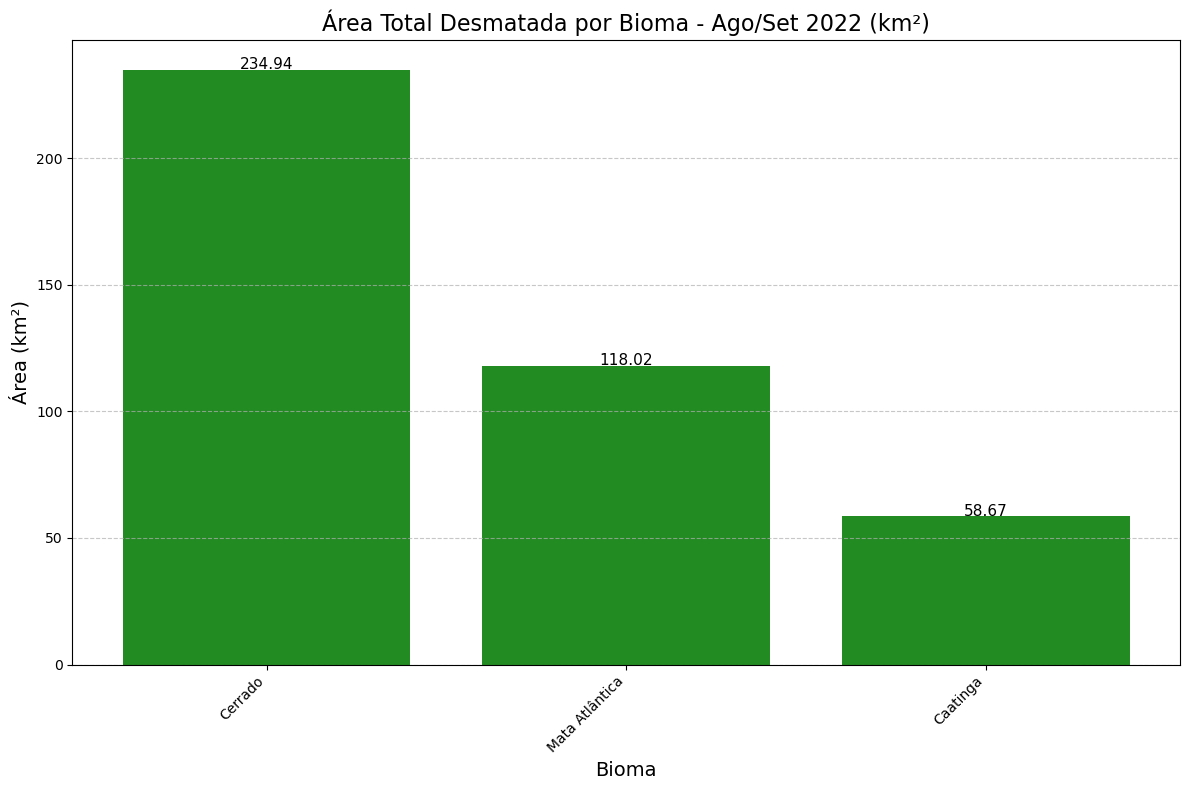

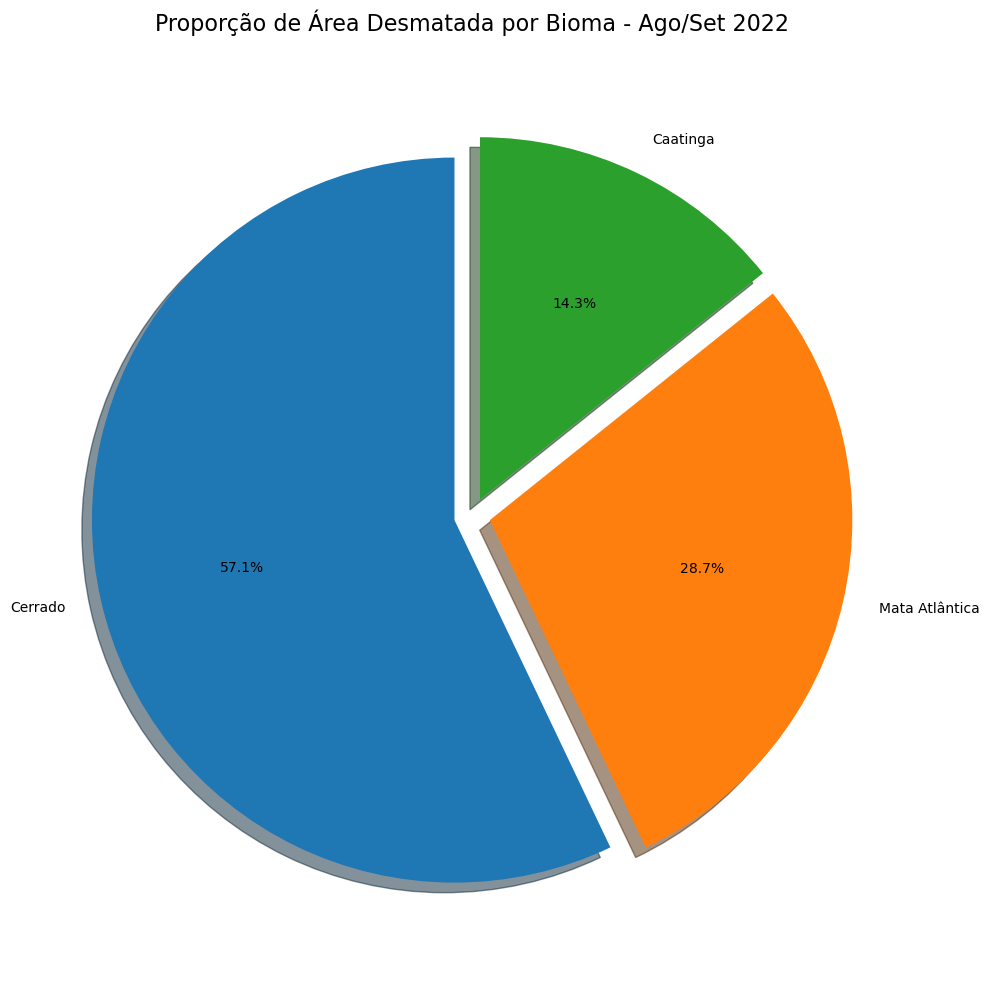

In [19]:
# Script para calcular a área total desmatada em km² por bioma (agosto e setembro de 2022)

# Converter área de hectares para km²
gdf_unido['area_km2'] = gdf_unido['area_ha'] / 100  # 1 km² = 100 hectares

# Agrupar por bioma e somar as áreas
area_por_bioma = gdf_unido.groupby('Bioma')['area_km2'].sum().reset_index()

# Ordenar do maior para o menor
area_por_bioma = area_por_bioma.sort_values('area_km2', ascending=False)

# Exibir os resultados em uma tabela
print("Área total desmatada por bioma (agosto/setembro de 2022):")
print("=" * 50)
print(f"{'Bioma':<30} {'Área (km²)':<15}")
print("-" * 50)
for _, row in area_por_bioma.iterrows():
    print(f"{row['Bioma']:<30} {row['area_km2']:.2f}")
print("-" * 50)
print(f"{'TOTAL':<30} {area_por_bioma['area_km2'].sum():.2f}")
print("=" * 50)

# Criar um gráfico de barras para visualizar a comparação
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
bars = plt.bar(area_por_bioma['Bioma'], area_por_bioma['area_km2'], color='forestgreen')
plt.title('Área Total Desmatada por Bioma - Ago/Set 2022 (km²)', fontsize=16)
plt.xlabel('Bioma', fontsize=14)
plt.ylabel('Área (km²)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores em cima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# Criar um gráfico de pizza para mostrar a proporção
plt.figure(figsize=(10, 10))
plt.pie(area_por_bioma['area_km2'], labels=area_por_bioma['Bioma'], 
        autopct='%1.1f%%', startangle=90, shadow=True, 
        explode=[0.05]*len(area_por_bioma))
plt.axis('equal')
plt.title('Proporção de Área Desmatada por Bioma - Ago/Set 2022', fontsize=16)
plt.tight_layout()
plt.show()

Área desmatada por município de Minas Gerais (km²) - Agosto e Setembro de 2022
Município                      Agosto (km²)    Setembro (km²)  Total (km²)    
--------------------------------------------------------------------------------
Norte                          21.47           78.09           99.55
Triângulo Mineiro              32.11           65.83           97.93
Noroeste                       15.91           50.30           66.21
Alto Paranaíba                 12.40           35.22           47.62
Sul                            6.84           14.39           21.24
Jequitinhonha                  4.07           14.31           18.38
Zona da Mata                   11.02           5.88           16.89
Leste                          3.98           8.90           12.88
Alto São Francisco             6.99           4.09           11.09
Nordeste                       6.34           4.43           10.77
Central Metropolitana          4.45           4.62           9.07
--------------

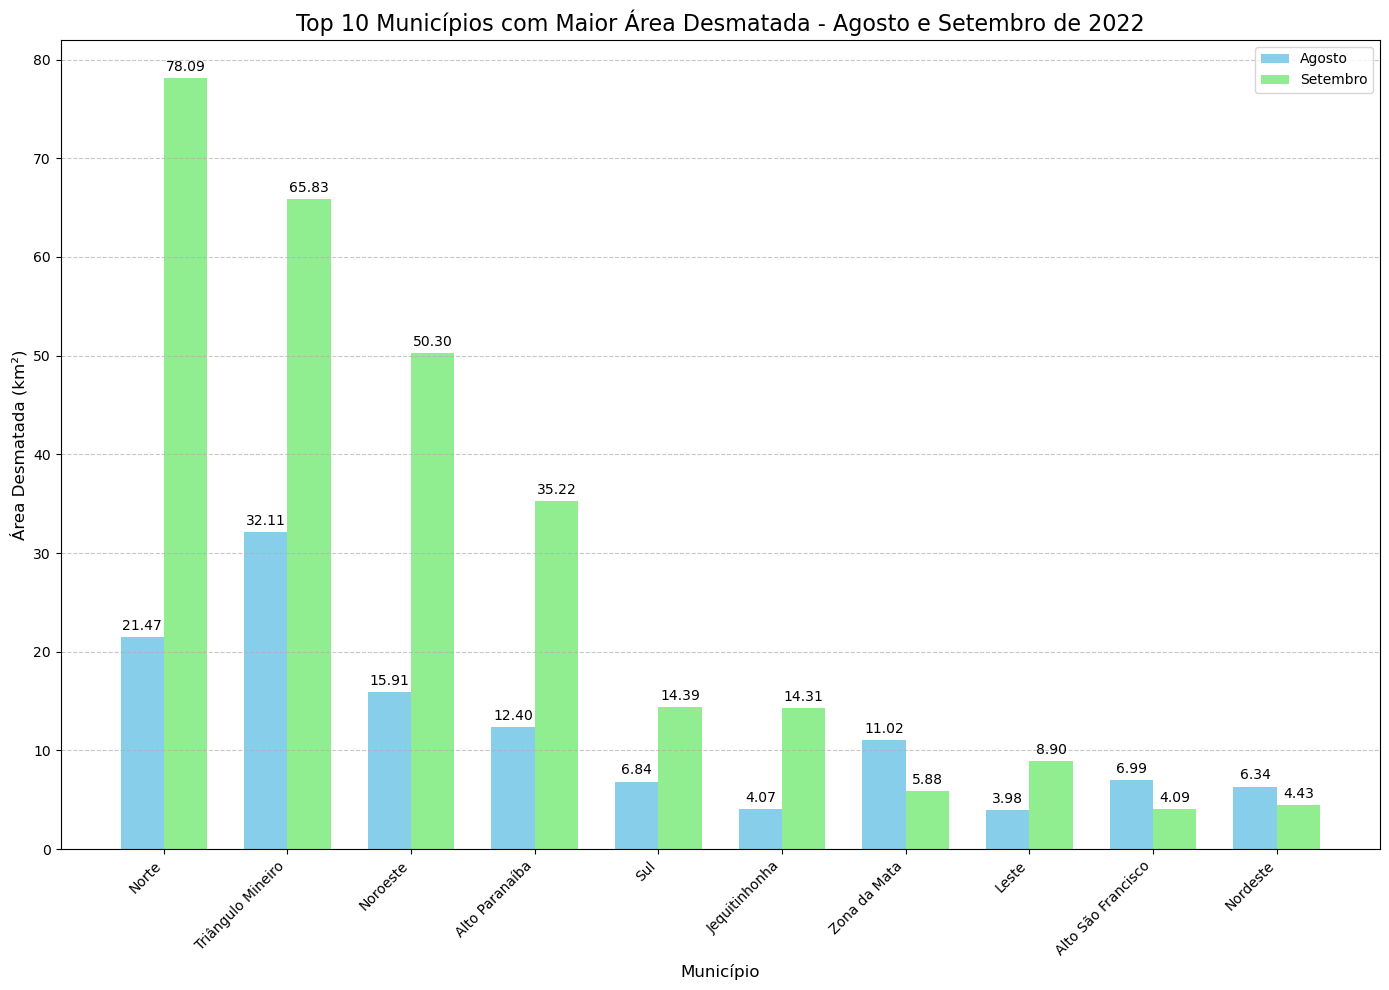

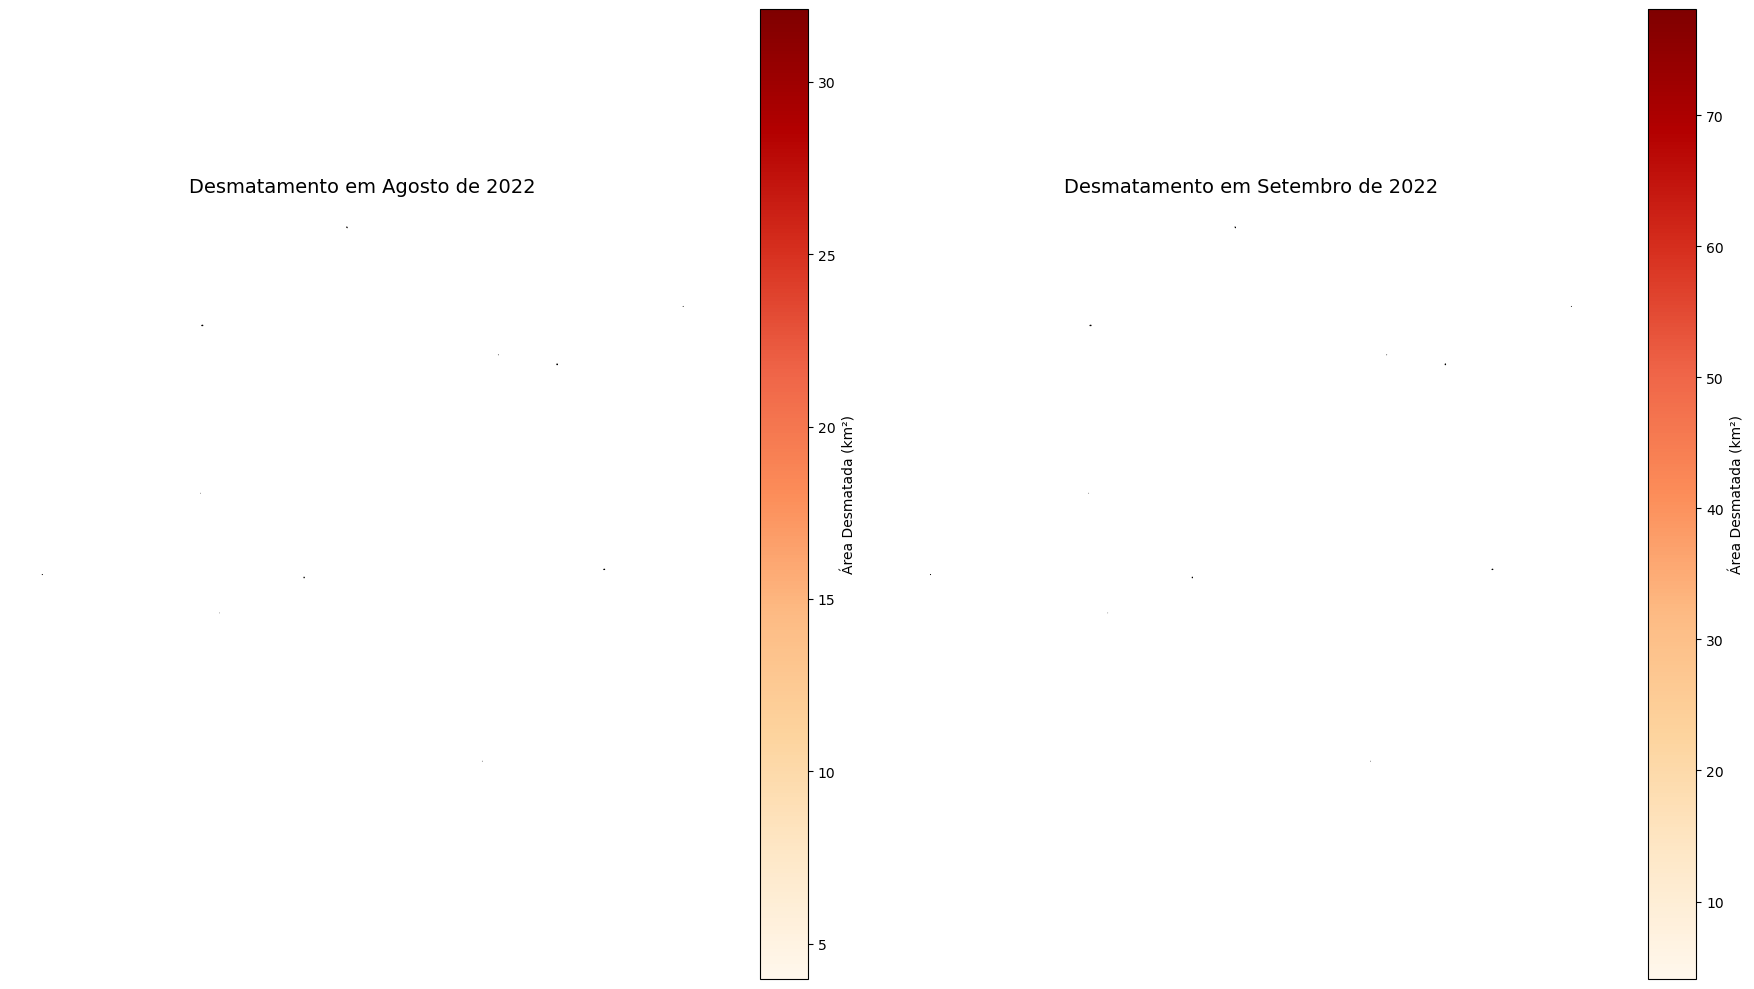

In [20]:
# Script para calcular a área total desmatada em km² por município de Minas Gerais em agosto e setembro de 2022

# Converter área de hectares para km²
gdf_unido['area_km2'] = gdf_unido['area_ha'] / 100  # 1 km² = 100 hectares

# Separar os dados por mês
agosto = gdf_unido[gdf_unido['mes'] == 'agosto']
setembro = gdf_unido[gdf_unido['mes'] == 'setembro']

# Agrupar por município e calcular a área total para cada mês
area_agosto = agosto.groupby('NuFis')['area_km2'].sum().reset_index()
area_agosto = area_agosto.rename(columns={'area_km2': 'area_agosto_km2'})

area_setembro = setembro.groupby('NuFis')['area_km2'].sum().reset_index()
area_setembro = area_setembro.rename(columns={'area_km2': 'area_setembro_km2'})

# Mesclar os dados dos dois meses
area_total = area_agosto.merge(area_setembro, on='NuFis', how='outer').fillna(0)

# Adicionar coluna com o total dos dois meses
area_total['area_total_km2'] = area_total['area_agosto_km2'] + area_total['area_setembro_km2']

# Ordenar pelo total (do maior para o menor)
area_total = area_total.sort_values('area_total_km2', ascending=False)

# Exibir os resultados em uma tabela
print("Área desmatada por município de Minas Gerais (km²) - Agosto e Setembro de 2022")
print("=" * 80)
print(f"{'Município':<30} {'Agosto (km²)':<15} {'Setembro (km²)':<15} {'Total (km²)':<15}")
print("-" * 80)

for _, row in area_total.iterrows():
    print(f"{row['NuFis']:<30} {row['area_agosto_km2']:.2f}{' '*10} {row['area_setembro_km2']:.2f}{' '*10} {row['area_total_km2']:.2f}")

print("-" * 80)
print(f"{'TOTAL':<30} {area_total['area_agosto_km2'].sum():.2f}{' '*10} {area_total['area_setembro_km2'].sum():.2f}{' '*10} {area_total['area_total_km2'].sum():.2f}")
print("=" * 80)

# Visualizar os 10 municípios com maior área desmatada
top_10 = area_total.head(10)

import matplotlib.pyplot as plt
import numpy as np

# Criar gráfico de barras para os 10 municípios com maior desmatamento
fig, ax = plt.subplots(figsize=(14, 10))

# Posições das barras
x = np.arange(len(top_10))
width = 0.35

# Criar as barras
agosto_bars = ax.bar(x - width/2, top_10['area_agosto_km2'], width, label='Agosto', color='skyblue')
setembro_bars = ax.bar(x + width/2, top_10['area_setembro_km2'], width, label='Setembro', color='lightgreen')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Município', fontsize=12)
ax.set_ylabel('Área Desmatada (km²)', fontsize=12)
ax.set_title('Top 10 Municípios com Maior Área Desmatada - Agosto e Setembro de 2022', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(top_10['NuFis'], rotation=45, ha='right')
ax.legend()

# Adicionar os valores em cima das barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(agosto_bars)
add_labels(setembro_bars)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Criar um mapa de calor se houver dados geoespaciais disponíveis
# Nota: Esta parte assume que você tem a geometria dos municípios no seu GeoDataFrame
# Se não tiver, esta parte pode ser removida ou adaptada

try:
    # Criar uma cópia do GeoDataFrame para o mapa
    gdf_map = gdf_unido[['NuFis', 'geometry']].drop_duplicates('NuFis')
    
    # Mesclar com os dados de área
    gdf_map = gdf_map.merge(area_total, on='NuFis', how='inner')
    
    # Criar mapas para agosto e setembro
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
    
    # Mapa para agosto
    gdf_map.plot(column='area_agosto_km2', ax=ax1, legend=True, 
                 cmap='OrRd', edgecolor='black', linewidth=0.5,
                 legend_kwds={'label': "Área Desmatada (km²)"})
    ax1.set_title('Desmatamento em Agosto de 2022', fontsize=14)
    ax1.set_axis_off()
    
    # Mapa para setembro
    gdf_map.plot(column='area_setembro_km2', ax=ax2, legend=True, 
                 cmap='OrRd', edgecolor='black', linewidth=0.5,
                 legend_kwds={'label': "Área Desmatada (km²)"})
    ax2.set_title('Desmatamento em Setembro de 2022', fontsize=14)
    ax2.set_axis_off()
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"Não foi possível criar os mapas: {e}")
    print("Verifique se a coluna 'geometry' contém dados geoespaciais válidos.")